In [71]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

%matplotlib inline

In [2]:
# Database-style DataFrame Merges
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                'data2': range(3)})

In [3]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
pd.merge(df1, df2, on = 'key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                'data2': range(3)})

In [8]:
pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [9]:
pd.merge(df1, df2, how = 'outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,NaN
7,NaN,d,2


In [10]:
# Many-to-many joins
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                'data2': range(5)})

In [11]:
pd.merge(df1, df2, on = 'key', how = 'left')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,2,a,0
5,2,a,2
6,3,c,NaN
7,4,a,0
8,4,a,2
9,5,b,1


In [12]:
pd.merge(df1, df2, how = 'inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [13]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})

In [14]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,NaN
3,bar,one,3,6
4,bar,two,NaN,7


In [15]:
pd.merge(left, right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [16]:
# Rename the duplicate keys
pd.merge(left, right, on = 'key1', suffixes = ('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [17]:
# Merging on index
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                   'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]},
                   index = ['a', 'b'])

In [18]:
pd.merge(left1, right1, left_on = 'key', right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [19]:
pd.merge(left1, right1, left_on = 'key', right_index = True, 
         how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [20]:
# Hierarchical-data merges
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 
                            'Nevada', 'Nevada'],
                  'key2': [2000, 2001, 2002, 2001, 2002],
                  'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index = [['Nevada', 'Nevada', 'Ohio',
                            'Ohio', 'Ohio', 'Ohio'],
                           [2001, 2000, 2000, 2000, 2001, 2002]],
                  columns = ['event1', 'event2'])

In [21]:
lefth

,data,key1,key2
0,0,Ohio,2000
1,1,Ohio,2001
2,2,Ohio,2002
3,3,Nevada,2001
4,4,Nevada,2002


In [22]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [23]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'],
        right_index = True)

,data,key1,key2,event1,event2
0,0,Ohio,2000,4,5
0,0,Ohio,2000,6,7
1,1,Ohio,2001,8,9
2,2,Ohio,2002,10,11
3,3,Nevada,2001,0,1


In [24]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'], 
         right_index = True, how = 'outer')

,data,key1,key2,event1,event2
0,0,Ohio,2000,4,5
0,0,Ohio,2000,6,7
1,1,Ohio,2001,8,9
2,2,Ohio,2002,10,11
3,3,Nevada,2001,0,1
4,4,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2,3


In [25]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                 index = ['a', 'c', 'e'],
                 columns = ['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                  index = ['b', 'c', 'd', 'e'],
                  columns = ['Missouri', 'Alabama'])

In [26]:
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [27]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [28]:
pd.merge(left2, right2, how = 'outer', left_index = True,
         right_index = True)

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
b,NaN,NaN,7,8
c,3,4,9,10
d,NaN,NaN,11,12
e,5,6,13,14


In [29]:
# More convenient joining by index
left2.join(right2, how = 'outer')

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
b,NaN,NaN,7,8
c,3,4,9,10
d,NaN,NaN,11,12
e,5,6,13,14


In [30]:
# This method also supports joining by column
left1.join(right1, on = 'key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [31]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                   index = ['a', 'c', 'e', 'f'],
                   columns = ['New York', 'Oregon'])

In [32]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,NaN,NaN,7,8
c,3,4,9,10,9,10
e,5,6,13,14,11,12


In [33]:
# Concatenating along an axis (rowbind)
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [35]:
# Concat with labelled axis
s1 = Series([0, 1], index = ['a', 'b'])
s2 = Series([2, 3, 4], index = ['c', 'd', 'e'])
s3 = Series([5, 6], index = ['f', 'g'])

In [36]:
pd.concat([s1, s2, s3]) # Column bind

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [37]:
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [38]:
s4 = pd.concat([s1 * 5, s3])

In [39]:
pd.concat([s1, s4], axis = 1)

,0,1
a,0,0
b,1,5
f,NaN,5
g,NaN,6


In [40]:
pd.concat([s1, s4], axis = 1, join = 'inner')

,0,1
a,0,0
b,1,5


In [42]:
pd.concat([s1, s4], axis = 1, join_axes = [['a', 'c', 'b', 'e']])

,0,1
a,0,0
c,NaN,NaN
b,1,5
e,NaN,NaN


In [45]:
result = pd.concat([s1, s1, s3], keys = ['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [46]:
result.unstack()

,a,b,f,g
one,0,1,NaN,NaN
two,0,1,NaN,NaN
three,NaN,NaN,5,6


In [47]:
pd.concat([s1, s2, s3], axis = 1, keys = ['one', 'two', 'three'])

,one,two,three
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [51]:
# Concat with DataFrames
df1 = DataFrame(np.arange(6).reshape((3, 2)), 
                index = ['a', 'b', 'c'],
                columns = ['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape((2, 2)),
                index = ['a', 'c'],
                columns = ['three', 'four'])

In [52]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [53]:
pd.concat({'level1': df1, 'level2': df2}, axis = 1)

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [54]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'],
         names = ['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1      5    6
b          2   3    NaN  NaN
c          4   5      7    8

In [56]:
df1 = DataFrame(np.random.randn(3, 4), 
               columns = ['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), 
               columns = ['b', 'd', 'a'])

In [57]:
df1

,a,b,c,d
0,-0.995855,0.854624,0.372807,-1.057416
1,0.728744,1.220832,1.845024,2.104258
2,1.803449,2.775540,0.338320,-0.023190


In [58]:
df2

,b,d,a
0,0.486205,0.674075,1.180739
1,-0.203408,0.761263,-1.366668


In [60]:
pd.concat([df1, df2], ignore_index = True)

,a,b,c,d
0,-0.995855,0.854624,0.372807,-1.057416
1,0.728744,1.220832,1.845024,2.104258
2,1.803449,2.775540,0.338320,-0.023190
3,1.180739,0.486205,NaN,0.674075
4,-1.366668,-0.203408,NaN,0.761263


In [61]:
# Combining data with overlap
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
          index = ['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype = np.float64),
          index = ['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [62]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [63]:
b

f     0
e     1
d     2
c     3
b     4
a   NaN
dtype: float64

In [64]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [65]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})

In [66]:
df1.combine_first(df2)

,a,b,c
0,1,NaN,2
1,4,2,6
2,5,4,10
3,3,6,14
4,7,8,NaN


In [73]:
# Reshaping with hierarchical indexing
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [74]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [75]:
result.unstack()

/Users/jburchell/.virtualenvs/daup/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [76]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [77]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [78]:
s1 = Series([0, 1, 2, 3], index = ['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index = ['c', 'd', 'e'])

In [79]:
data2 = pd.concat([s1, s2], keys = ['one', 'two'])

In [80]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,NaN
two,NaN,NaN,4,5,6


In [81]:
data2.unstack().stack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: float64

In [83]:
data2.unstack().stack(dropna = False)

one  a     0
     b     1
     c     2
     d     3
     e   NaN
two  a   NaN
     b   NaN
     c     4
     d     5
     e     6
dtype: float64

In [84]:
df = DataFrame({'left': result, 'right': result + 5},
               columns = pd.Index(['left', 'right'],
                                 name = 'side'))

In [85]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [86]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [87]:
df.unstack('state').stack('side')

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

In [88]:
# Pivoting "long" to "wide"
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [89]:
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [90]:
pivoted = ldata.pivot('date', 'item', 'value')

In [91]:
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [92]:
ldata['value2'] = np.random.randn(len(ldata))

In [93]:
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,-0.204708
1,1959-03-31,infl,0.000,0.478943
2,1959-03-31,unemp,5.800,-0.519439
3,1959-06-30,realgdp,2778.801,-0.555730
4,1959-06-30,infl,2.340,1.965781
5,1959-06-30,unemp,5.100,1.393406
6,1959-09-30,realgdp,2775.488,0.092908
7,1959-09-30,infl,2.740,0.281746
8,1959-09-30,unemp,5.300,0.769023
9,1959-12-31,realgdp,2785.204,1.246435


In [94]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  0.478943 -0.204708 -0.519439
1959-06-30  2.34  2778.801   5.1  1.965781 -0.555730  1.393406
1959-09-30  2.74  2775.488   5.3  0.281746  0.092908  0.769023
1959-12-31  0.27  2785.204   5.6  1.007189  1.246435 -1.296221
1960-03-31  2.31  2847.699   5.2  0.228913  0.274992  1.352917

In [96]:
# Removing duplicates
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [97]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [98]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [99]:
data['v1'] = range(7)

In [100]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [103]:
data.drop_duplicates(['k1', 'k2'], keep = 'last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [104]:
# Transforming data using a function or mapping
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                          'Pastrami', 'corned beef', 'Bacon',
                          'pastrami', 'honey ham', 'nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [105]:
meat_to_animal = {'bacon': 'pig',
                  'pulled pork': 'pig',
                  'pastrami': 'cow',
                  'corned beef': 'cow',
                  'honey ham': 'pig',
                  'nova lox': 'salmon'
                 }

In [106]:
# Map performs element-wise transformations at the same time as 
# appending data
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [107]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [108]:
# Replacing values
data = Series([1., -999., 2., -999., -1000., 3])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [109]:
data.replace(-999, np.nan)

0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64

In [110]:
data.replace([-999, -1000], np.nan)

0     1
1   NaN
2     2
3   NaN
4   NaN
5     3
dtype: float64

In [111]:
data.replace([-999, -1000], [np.nan, 0])

0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64

In [112]:
data.replace({-999: np.nan, -1000: 0})

0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64

In [113]:
# Renaming axis indexes
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index = ['Ohio', 'Colorado', 'New York'],
                 columns = ['one', 'two', 'three', 'four'])

In [114]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [115]:
data.index = data.index.map(str.upper)

In [116]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [117]:
data.rename(index = str.title, columns = str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [118]:
data.rename(index = {'OHIO': 'INDIANA'},
            columns = {'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [120]:
_ = data.rename(index = {'OHIO': 'INDIANA'}, inplace = True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [121]:
# Discretisation and binning
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [123]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [125]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [127]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [128]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [129]:
pd.cut(ages, [18, 26, 36, 61, 100], right = False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [132]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels = group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [134]:
data = np.random.randn(20)
pd.cut(data, 4, precision = 2)

[(0.64, 1.39], (-0.11, 0.64], (-0.11, 0.64], (-0.11, 0.64], (0.64, 1.39], ..., (-1.61, -0.86], (-0.86, -0.11], (-1.61, -0.86], (0.64, 1.39], (-1.61, -0.86]]
Length: 20
Categories (4, object): [(-1.61, -0.86] < (-0.86, -0.11] < (-0.11, 0.64] < (0.64, 1.39]]

In [135]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
cats

[(-0.0206, 0.641], (0.641, 3.26], [-3.745, -0.632], (-0.632, -0.0206], (0.641, 3.26], ..., (-0.632, -0.0206], (-0.632, -0.0206], (-0.0206, 0.641], (0.641, 3.26], (-0.0206, 0.641]]
Length: 1000
Categories (4, object): [[-3.745, -0.632] < (-0.632, -0.0206] < (-0.0206, 0.641] < (0.641, 3.26]]

In [136]:
pd.value_counts(cats)

(0.641, 3.26]        250
(-0.0206, 0.641]     250
(-0.632, -0.0206]    250
[-3.745, -0.632]     250
dtype: int64

In [137]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.0206, 1.302], (-0.0206, 1.302], [-3.745, -1.264], (-1.264, -0.0206], (1.302, 3.26], ..., (-1.264, -0.0206], (-1.264, -0.0206], (-0.0206, 1.302], (-0.0206, 1.302], (-0.0206, 1.302]]
Length: 1000
Categories (4, object): [[-3.745, -1.264] < (-1.264, -0.0206] < (-0.0206, 1.302] < (1.302, 3.26]]

In [138]:
# Detecting and filtering outliers
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [140]:
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [141]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [143]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


In [144]:
# Permutation and random sampling
df = DataFrame(np.arange(5 * 4).reshape(5, 4))
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [145]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [146]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [147]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [148]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size = 10)
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [149]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

In [150]:
# Computing indicator/dummy variables
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [151]:
dummies = pd.get_dummies(df['key'], prefix = 'key')

In [153]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [156]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat',
                       sep = '::',
                       header = None,
                       names = mnames,
                       engine = 'python')

In [157]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [158]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [159]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), 
                    columns = genres)

In [160]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [161]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))

In [162]:
movies_windic.ix[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [164]:
values = np.random.rand(10)

In [165]:
values

array([ 0.756 ,  0.9083,  0.9659,  0.1737,  0.8759,  0.7542,  0.1635,
        0.2378,  0.8556,  0.5874])

In [166]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [167]:
pd.get_dummies(pd.cut(values, bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,0,0,1
9,0,0,1,0,0


In [168]:
# String manipulation
val = 'a,b,  guido'

In [169]:
val.split(',')

['a', 'b', '  guido']

In [171]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [172]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [173]:
'::'.join(pieces)

'a::b::guido'

In [174]:
'guido' in val

True

In [175]:
val.index(',')

1

In [176]:
val.find(':')

-1

In [177]:
val.count(',')

2

In [178]:
val.replace(',', '::')

'a::b::  guido'

In [179]:
val.replace(',', '')

'ab  guido'

In [180]:
# Regular expression
import re
text = "foo    bar\t baz  \tqux"

In [181]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [182]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [183]:
regex.findall(text)

['    ', '\t ', '  \t']

In [184]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

In [185]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [186]:
regex = re.compile(pattern, flags = re.IGNORECASE)

In [187]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [190]:
m = regex.search(text)
m

In [191]:
text[m.start():m.end()]

'dave@google.com'

In [192]:
print regex.match(text)

None


In [193]:
print regex.sub('REDACTED', text)

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [194]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags = re.IGNORECASE)

In [196]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [197]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [198]:
print regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text)

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [202]:
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [203]:
m = regex.match('wes@bright.net')
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wes'}

In [204]:
# Vectorised string functions in pandas
data = {'Dave': 'dave@google.com',
        'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com',
        'Wes': np.nan}
data = Series(data)
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [205]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [206]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [207]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [208]:
data.str.findall(pattern, flags = re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [209]:
matches = data.str.match(pattern, flags = re.IGNORECASE)
matches

/Users/jburchell/.virtualenvs/daup/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [210]:
matches.str.get(1)

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

In [211]:
matches.str[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

In [212]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

In [213]:
# Example: USDA food database
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [214]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [215]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [216]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [217]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns = info_keys)

In [218]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [220]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [221]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index = True)

In [223]:
nutrients[:10]

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [224]:
nutrients.duplicated().sum()

14223

In [225]:
nutrients = nutrients.drop_duplicates()

In [226]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}
info = info.rename(columns = col_mapping, copy = False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [228]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}
nutrients = nutrients.rename(columns = col_mapping, copy = False)
nutrients[:10]

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [230]:
ndata = pd.merge(nutrients, info, on = 'id', how = 'outer')
ndata[:10]

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.28,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.00,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.00,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.00,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.64,1008,"Cheese, caraway",Dairy and Egg Products,


In [232]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

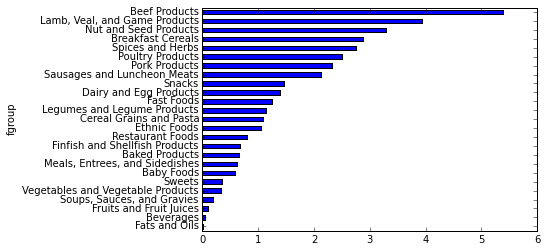

In [234]:
result['Zinc, Zn'].sort_values().plot(kind = 'barh')

In [237]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# Make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [238]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 